In [1]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.arima.model import ARIMA

In [21]:
Machine = pd.read_csv('Machine.csv')

In [22]:
Machine

,Time[ms],NC_NNO,NC_ONO,SP1_SPEED(1/min),SP1_EPMTR(kW),SV1(X)_TCMD(%),SV5(AM1)_TCMD(%),SV3(Z)_POSF(mm),SV3(Z)_TCMD(%)
0,0,130,3,3.0,0.45,-0.151057,-0.343312,0.000000,0.068662
1,1,130,3,3.0,0.44,-0.164790,-0.343312,0.000000,0.068662
2,2,130,3,3.0,0.44,-0.164790,-0.343312,0.000000,0.068662
3,3,130,3,3.0,0.45,-0.164790,-0.343312,-0.001989,0.068662
4,4,130,3,3.0,0.44,-0.164790,-0.343312,-0.000994,0.068662
...,...,...,...,...,...,...,...,...,...
163619,163619,1640,3,1.0,0.16,-1.455644,-0.137325,0.008950,0.590497
163620,163620,1640,3,1.0,0.17,-1.441912,-0.137325,0.008950,0.604230
163621,163621,1640,3,1.0,0.17,-1.455644,-0.137325,0.008950,0.590497
163622,163622,1640,3,1.0,0.17,-1.510574,-0.137325,0.008950,0.590497


In [23]:
type(Machine)

pandas.core.frame.DataFrame

In [24]:
Machine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 163624 entries, 0 to 163623
Data columns (total 9 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Time[ms]          163624 non-null  int64  
 1   NC_NNO            163624 non-null  int64  
 2   NC_ONO            163624 non-null  int64  
 3   SP1_SPEED(1/min)  163624 non-null  float64
 4   SP1_EPMTR(kW)     163624 non-null  float64
 5   SV1(X)_TCMD(%)    163624 non-null  float64
 6   SV5(AM1)_TCMD(%)  163624 non-null  float64
 7   SV3(Z)_POSF(mm)   163624 non-null  float64
 8   SV3(Z)_TCMD(%)    163624 non-null  float64
dtypes: float64(6), int64(3)
memory usage: 11.2 MB


In [78]:
Machine = pd.read_csv('Machine.csv', index_col=[0],parse_dates=True)
Machine = Machine.iloc[:, 3]  

In [79]:
type(Machine)

pandas.core.series.Series

In [80]:
Machine

Time[ms]
0         0.45
1         0.44
2         0.44
3         0.45
4         0.44
          ... 
163619    0.16
163620    0.17
163621    0.17
163622    0.17
163623    0.17
Name: SP1_EPMTR(kW), Length: 163624, dtype: float64

In [87]:
energy_df = Machine.to_frame()
print(energy_df.head())

          SP1_EPMTR(kW)
Time[ms]               
0                  0.45
1                  0.44
2                  0.44
3                  0.45
4                  0.44


In [88]:
# Round the values in the 'SP1_SPEED(1/min)' column to 2 decimal places
energy_df['SP1_EPMTR(kW)'] = energy_df['SP1_EPMTR(kW)'].round(2)

# Verify the changes
print(energy_df['SP1_EPMTR(kW)'].head())


Time[ms]
0    0.45
1    0.44
2    0.44
3    0.45
4    0.44
Name: SP1_EPMTR(kW), dtype: float64


In [89]:
energy_df = Machine.to_frame()
print(energy_df.head())

          SP1_EPMTR(kW)
Time[ms]               
0                  0.45
1                  0.44
2                  0.44
3                  0.45
4                  0.44


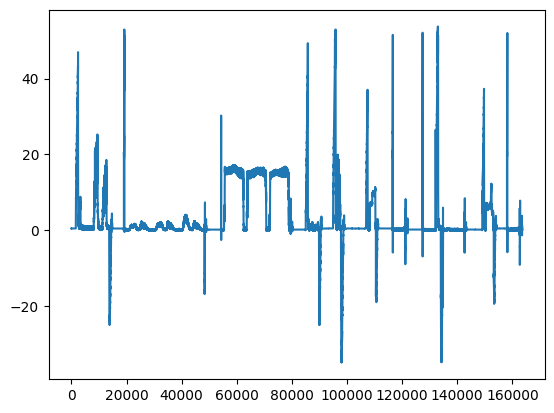

In [91]:
import matplotlib.pyplot as plt
plt.plot(energy_df['SP1_EPMTR(kW)'])

In [92]:
# performing Augmented dickey fuller test to check hypothesis
from statsmodels.tsa.stattools import adfuller
#plt.plot(figsize=(16,5))
print ('Results of Dickey-Fuller Test:')
Machine_test=adfuller(energy_df['SP1_EPMTR(kW)'],autolag='AIC')
Machine_output=pd.Series(Machine_test[0:4],index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in Machine_test[4].items():
    Machine_output['Critical value (%s)'%key ] = value
    #dfoutput['Critical Value (%s)'%key] = value
print(Machine_output)    
ans=Machine_output
print("Condition:")
print("p-value<=0.05-->Accept Alternate Hypothesis")
print("p-value>0.05-->Accept Null Hypothesis")
if(ans['Test Statistic']<ans['Critical value (1%)'] or ans['Test Statistic']<ans['Critical value (5%)'] or
   ans['Test Statistic']<ans['Critical value (10%)'] and ans['p-value'] < 0.05):
    #Test statistic < 1%,5%,10% and p_value<=0.05 
  print("Condition: statictic < any critical value and p-value <0.05 to reject null hypothesis")
  print("Reject null hypothesis:Non Stationarity")
  print("Accept Alternate hypothesis:Stationarity")
  message="Stationarity based on ADH"  

else:
    print("Condition: statictic < any critical value and p-value <0.05 to reject null hypothesis")
    print("Accept null hypothesis:Non Stationarity" )
    print("Reject Alternate hypothesis:Staionarity ")
    message="Non-stationarity based on ADH"


Results of Dickey-Fuller Test:
Test Statistic                -1.007713e+01
p-value                        1.215464e-17
#Lags Used                     7.700000e+01
Number of Observations Used    1.635460e+05
Critical value (1%)           -3.430390e+00
Critical value (5%)           -2.861558e+00
Critical value (10%)          -2.566779e+00
dtype: float64
Condition:
p-value<=0.05-->Accept Alternate Hypothesis
p-value>0.05-->Accept Null Hypothesis
Condition: statictic < any critical value and p-value <0.05 to reject null hypothesis
Reject null hypothesis:Non Stationarity
Accept Alternate hypothesis:Stationarity


<function matplotlib.pyplot.show(close=None, block=None)>

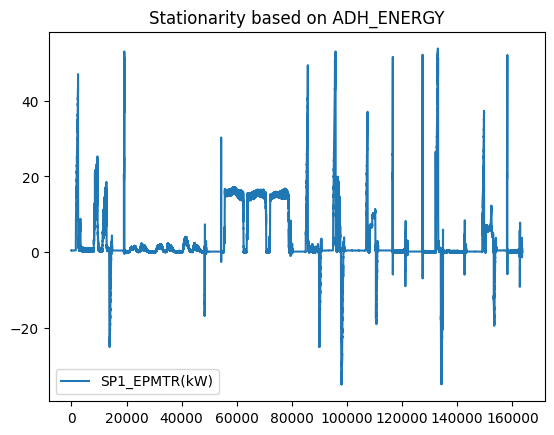

In [94]:
plt.plot(Machine.index, energy_df['SP1_EPMTR(kW)'],label="SP1_EPMTR(kW)")
plt.legend(loc='best')
plt.title("{}_ENERGY".format(message))
#plt.savefig("{}_ADH.png".format(pollutant))
plt.show

In [95]:
from statsmodels.tsa.stattools import acf,pacf
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

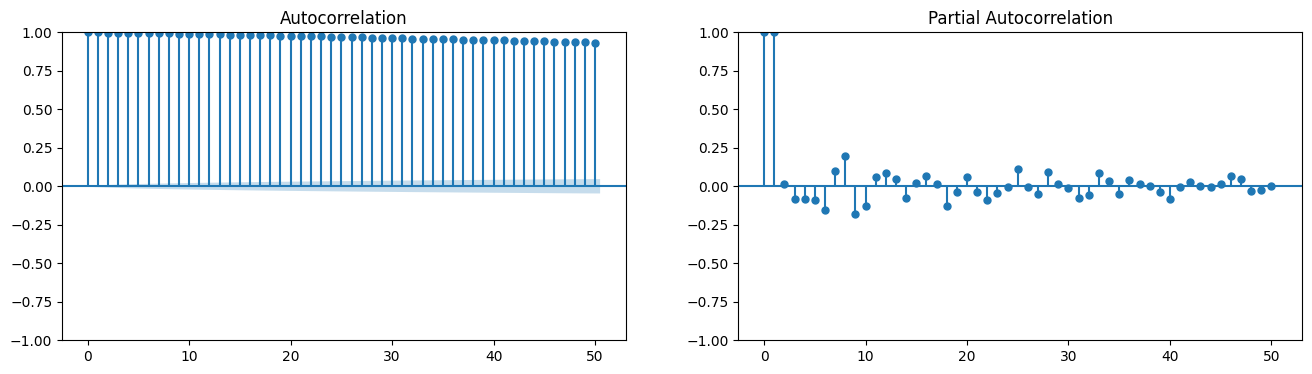

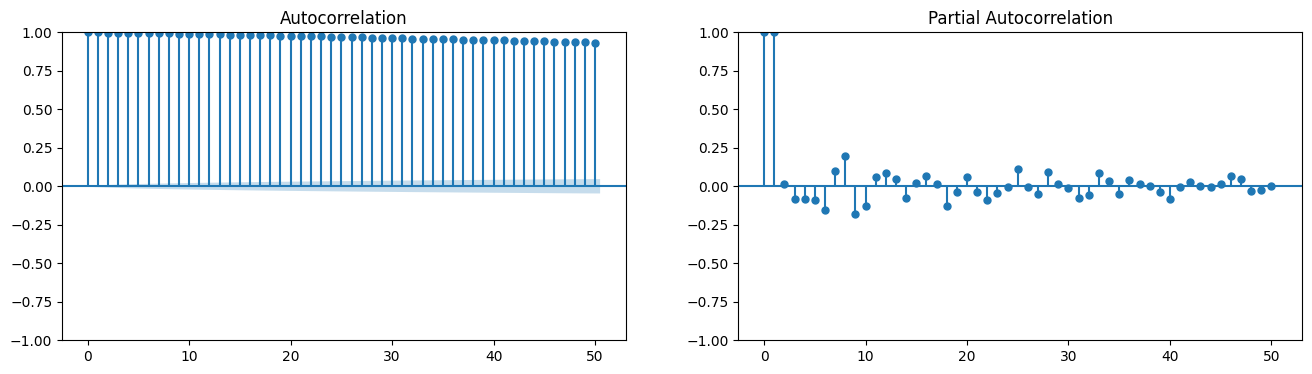

In [97]:
fig,axes= plt.subplots(1,2,figsize=(16,4),dpi=100)
plot_acf(energy_df['SP1_EPMTR(kW)'].tolist(),lags=50,ax=axes[0])
plot_pacf(energy_df['SP1_EPMTR(kW)'].tolist(),lags=50,ax=axes[1])

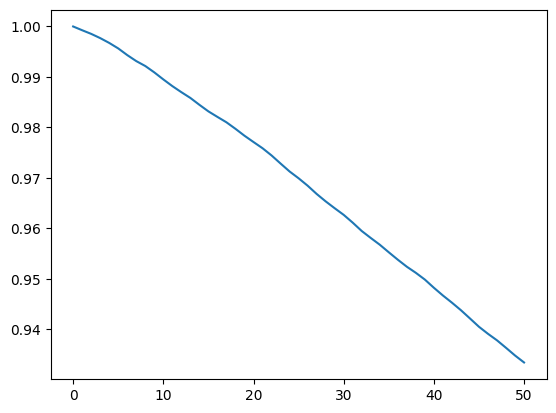

In [98]:
plt.plot(acf(energy_df['SP1_EPMTR(kW)'],nlags=50))

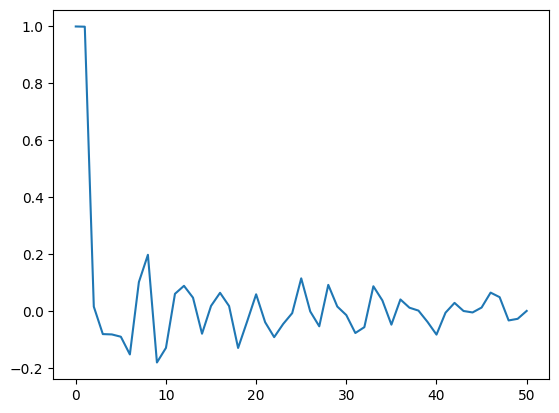

In [99]:
plt.plot(pacf(energy_df['SP1_EPMTR(kW)'],nlags=50))

In [100]:
#scaling
from sklearn.preprocessing import MinMaxScaler
Ms = MinMaxScaler()

data1 = Ms.fit_transform(energy_df[['SP1_EPMTR(kW)']])

#data1= Ms.fit_transform(Machine[column])
print("Len:",data1.shape)

len(data1)

#from sklearn.preprocessing import MinMaxScaler

#scaler = MinMaxScaler()
#X_train_scaled = scaler.fit_transform(X_train.reshape(-1, 1)).ravel()
#y_test_scaled = scaler.transform(y_test.reshape(-1, 1)).ravel()


Len: (163624, 1)


163624

In [101]:
training_size = round(len(data1 ) * 0.80)
print(training_size)
X_train=data1[:training_size]
X_test=data1[training_size:]
print("X_train length:",X_train.shape)
print("X_test length:",X_test.shape)
y_train=data1[:training_size]
y_test=data1[training_size:]
print("y_train length:",y_train.shape)
print("y_test length:",y_test.shape)

130899
X_train length: (130899, 1)
X_test length: (32725, 1)
y_train length: (130899, 1)
y_test length: (32725, 1)


In [102]:
import warnings
warnings.filterwarnings("ignore")

In [103]:
# Define trends and lags
#trends = ['n', 't', 'c', 'ct']
orders = [(1,1,1),(1,1,2),(2,3,1),(2,2,2),(5,1,0)]

In [104]:
# Function to calculate RMSE and MAPE
def rmsemape(actual, predicted):
# Ensure both actual and predicted are 1D arrays
    #actual = np.ravel(actual)
    #predicted = np.ravel(predicted)
    
    # Mask zero and negative values in actual data
    #mask = actual > 0  # Only consider values greater than zero
    #actual = actual[mask]
    #predicted = predicted[mask]
    
    mse = mean_squared_error(actual, predicted, squared=False)
    print(f"RMSE: {mse}")
    mape = np.mean(np.abs((actual - predicted) / actual)) * 100
    #mape = np.mean(np.abs((actual - predicted) / np.maximum(actual, 1e-10))) * 100

    print(f"MAPE: {mape}%")
    return mse, mape

In [105]:
# Training and evaluating models
import numpy as np
for i in orders:
#for td in trends:
    model = ARIMA(X_train,order=i)
    model_fit = model.fit()
    y_pred = model_fit.predict(len(X_train), len(data1) - 1)
    #print(f"Trend={td}")
    rmsemape(y_test, y_pred)
    print("****")

#results = []
#for i in orders:
    #model = ARIMA(X_train, order=i)
    #model_fit = model.fit()
    #y_pred = model_fit.predict(len(X_train), len(data1) - 1)
    #mse, mape = rmsemape(y_test, y_pred)
    #results.append({'order': i, 'RMSE': mse, 'MAPE': mape})

#best_result = min(results, key=lambda x: x['MAPE'])
#print("Best result:", best_result)


RMSE: 0.09104956792557667
MAPE: 27.338750280839736%
****
RMSE: 0.09104956790282263
MAPE: 27.33875027646753%
****
RMSE: 383.77653352765816
MAPE: 87192.89135602051%
****
RMSE: 2.3413171532083843
MAPE: 638.7599590183047%
****
RMSE: 0.09105888050530367
MAPE: 27.340849773188985%
****


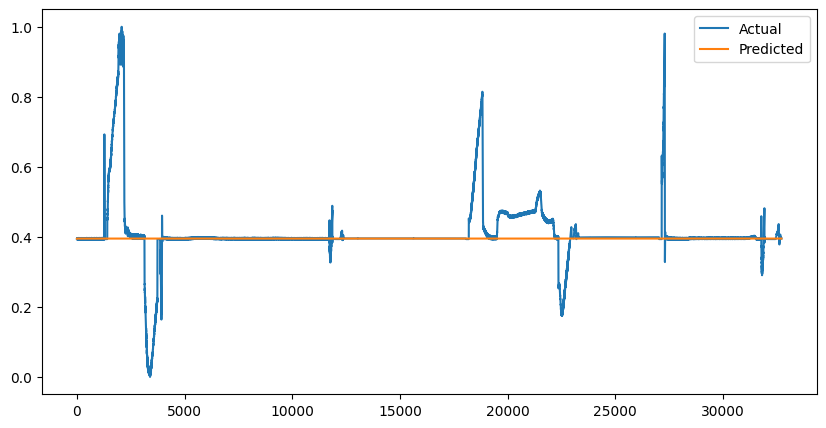

In [106]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 5))
plt.plot(y_test, label="Actual")
plt.plot(y_pred, label="Predicted")
plt.legend()
plt.show()

In [107]:
# Forecasting
i = (1,1,2)
#td = 'ct'
model = ARIMA(X_train, order=i)
model_fit = model.fit()
y_pred = model_fit.predict(len(X_train), len(data1) - 1)

In [108]:
y_pred

array([0.39528589, 0.39528589, 0.39528589, ..., 0.39528589, 0.39528589,
       0.39528589])

In [109]:
# Inverse transform the scaled data
aTestNormTable = pd.DataFrame(y_test, columns=[column])
actual_Machine_test_ori = MS.inverse_transform(aTestNormTable)
actual_Machine_test_oriA = pd.DataFrame(actual_Machine_test_ori, columns=[column])

In [112]:
# Assume 'y_test' contains the scaled speed data and 'MS' is the scaler used (e.g., MinMaxScaler or StandardScaler)
# Replace 'speed_column' with the actual name of your speed column (e.g., 'SP1_SPEED(1/min)')

# Step 1: Convert scaled data (y_test) to a DataFrame for inverse transformation
aTestNormTable = pd.DataFrame(y_test, columns=['SP1_EPMTR(kW)'])

# Step 2: Inverse transform the scaled data back to original speed values
actual_energy_test_ori = MS.inverse_transform(aTestNormTable)

# Step 3: Convert the inverse-transformed data into a DataFrame to retain the original column name
actual_energy_test_oriA = pd.DataFrame(actual_energy_test_ori, columns=['SP1_EPMTR(kW)'])

# Now you can view 'actual_speed_test_oriA' which contains the speed values in their original scale


In [113]:
actual_energy_test_oriA

,SP1_EPMTR(kW)
0,3148.755160
1,3146.942371
2,3152.380738
3,3142.410398
4,3141.504004
...,...
32720,3158.725499
32721,3159.631894
32722,3159.631894
32723,3159.631894


In [114]:
pTestNormTable = pd.DataFrame(y_pred, columns=['SP1_EPMTR(kW)'])
predicted_energy_test_ori = MS.inverse_transform(pTestNormTable)
predicted_energy_test_oriP = pd.DataFrame(predicted_energy_test_ori, columns=['SP1_EPMTR(kW)'])

In [115]:
predicted_energy_test_oriP

,SP1_EPMTR(kW)
0,3156.912710
1,3156.912712
2,3156.912712
3,3156.912712
4,3156.912712
...,...
32720,3156.912712
32721,3156.912712
32722,3156.912712
32723,3156.912712


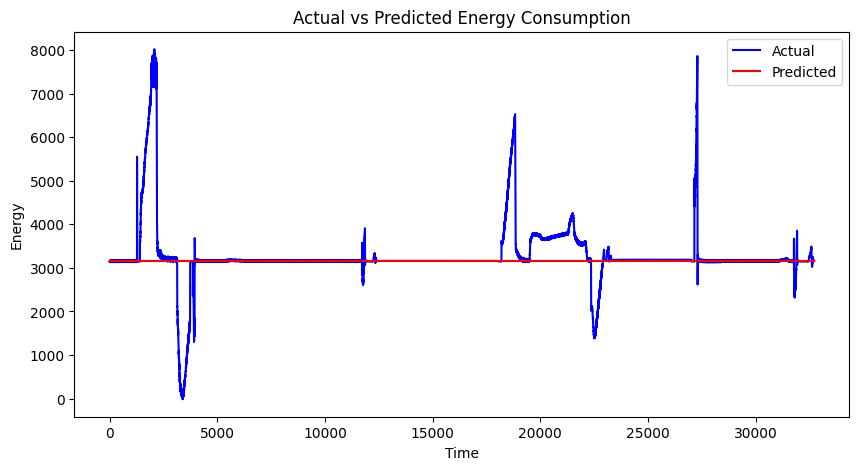

In [116]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 5))
plt.plot(actual_energy_test_oriA.values, color='blue', label="Actual")
plt.plot(predicted_energy_test_oriP.values, color='red', label="Predicted")
plt.legend()
plt.title("Actual vs Predicted Energy Consumption")
plt.xlabel("Time")
plt.ylabel("Energy")
plt.show()